In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import plot_model
from tensorflow.keras import layers
from tensorflow import keras

from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import visualkeras
import cv2
import os

In [2]:
X_DATA_PATH = "./data/cropped/"
Y_DATA_PATH = "./data/resized/"

x_data_path_list = os.listdir(X_DATA_PATH)
y_data_path_list = os.listdir(Y_DATA_PATH)

X, y = list(), list()
for x_data_path in tqdm(x_data_path_list, desc=f'X data loading...'):   X.append(cv2.imread(X_DATA_PATH + x_data_path))
for y_data_path in tqdm(y_data_path_list, desc=f'Y data loading...'):   y.append(cv2.imread(Y_DATA_PATH + y_data_path))

Y data loading...: 100%|██████████| 5000/5000 [00:03<00:00, 1662.35it/s]


In [3]:
X = np.array(X)
y = np.array(y)

scaler = MinMaxScaler()
X = scaler.fit_transform(X.reshape(-1, 1)).reshape(X.shape)
y = scaler.fit_transform(y.reshape(-1, 1)).reshape(y.shape)

print(f"""X shape: {X.shape}
y shape: {y.shape}""")

X shape: (5000, 256, 256, 3)
y shape: (5000, 256, 256, 3)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"""X_train shape: {X_train.shape}
y_train shape: {y_train.shape}
X_test shape: {X_test.shape}
y_test shape: {y_test.shape}""")

X_train shape: (4000, 256, 256, 3)
y_train shape: (4000, 256, 256, 3)
X_test shape: (1000, 256, 256, 3)
y_test shape: (1000, 256, 256, 3)


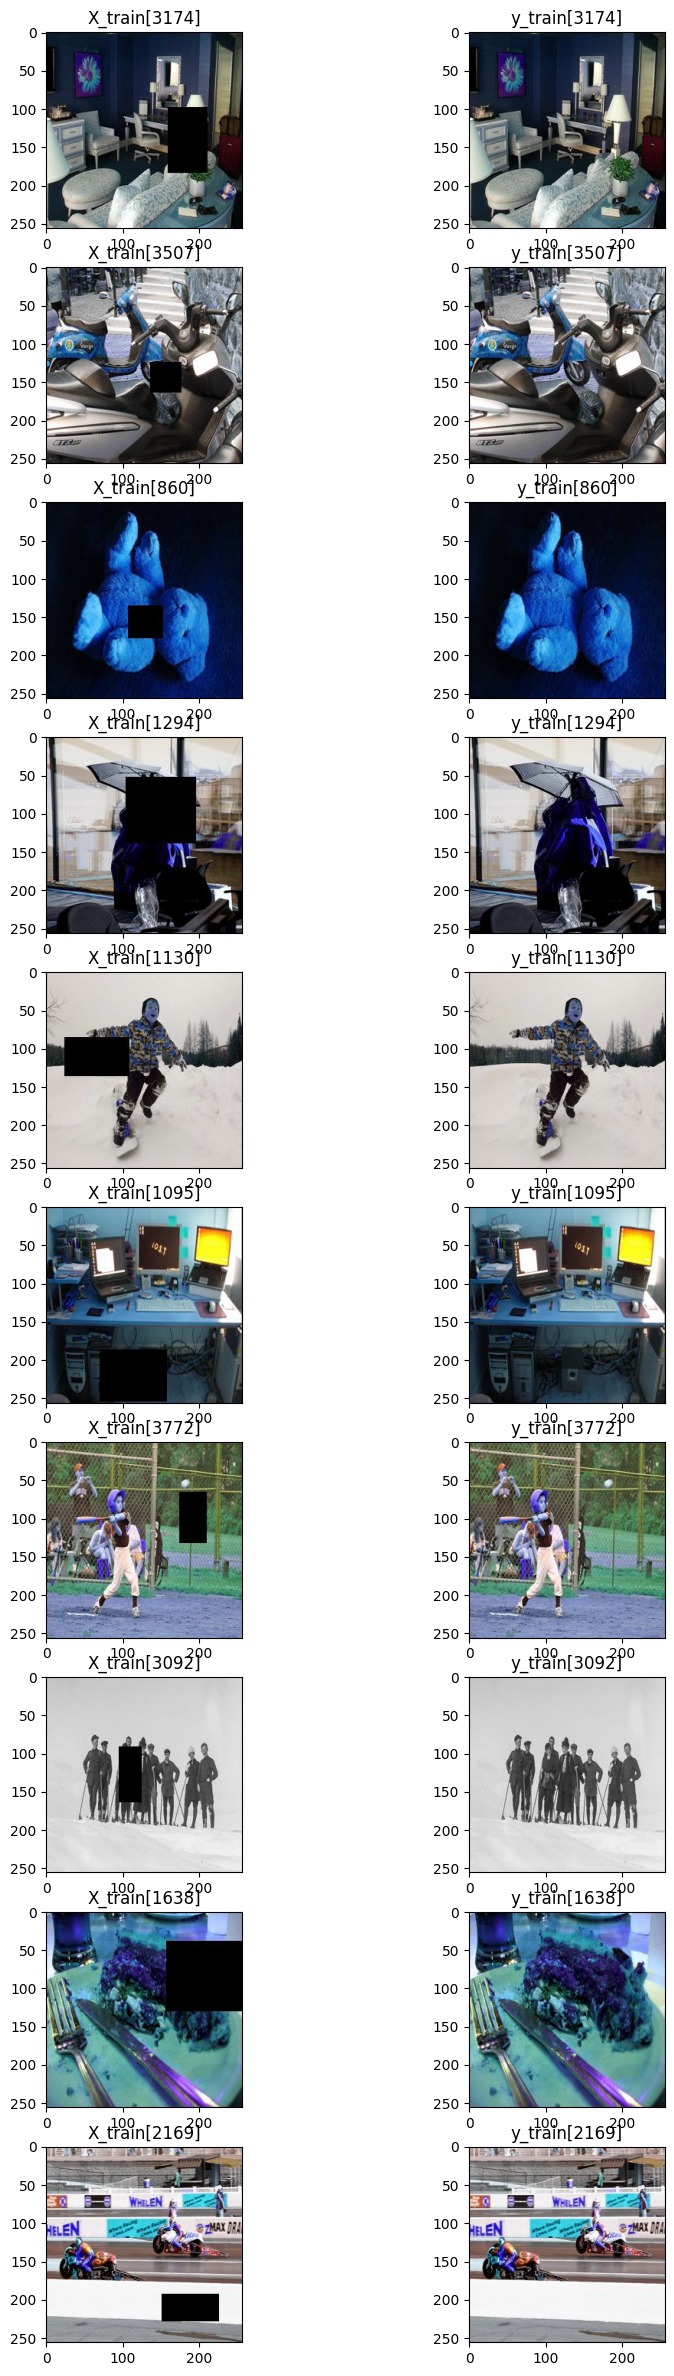

In [5]:
np.random.seed(42)

randlist = np.random.randint(0, X_train.shape[0], 10)

ax, fig = plt.subplots(10, 2, figsize=(10, 30))
for i, j in zip(range(10), randlist):
    fig[i][0].title.set_text(f"X_train[{j}]")
    fig[i][1].title.set_text(f"y_train[{j}]")
    fig[i][0].imshow(X_train[j])
    fig[i][1].imshow(y_train[j])
plt.show()

In [7]:
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3])),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),

    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),

    layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),

    layers.Conv2D(512, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(512, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),

    # layers.Dense(512, activation='relu'),

    layers.Conv2DTranspose(256, (3, 3), padding='same', activation='relu'),
    layers.Conv2DTranspose(256, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),

    layers.Conv2DTranspose(128, (3, 3), padding='same', activation='relu'),
    layers.Conv2DTranspose(128, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),

    layers.Conv2DTranspose(64, (3, 3), padding='same', activation='relu'),
    layers.Conv2DTranspose(64, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),

    layers.Conv2DTranspose(3, (3, 3), padding='same', activation='relu'),
    layers.Conv2DTranspose(3, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
])

model.summary()


Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 256, 256, 64)      1792      
                                                                 
 conv2d_9 (Conv2D)           (None, 256, 256, 64)      36928     
                                                                 
 batch_normalization_6 (Bat  (None, 256, 256, 64)      256       
 chNormalization)                                                
                                                                 
 conv2d_10 (Conv2D)          (None, 256, 256, 128)     73856     
                                                                 
 conv2d_11 (Conv2D)          (None, 256, 256, 128)     147584    
                                                                 
 batch_normalization_7 (Bat  (None, 256, 256,

In [8]:
optimzier = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimzier, loss='mse', metrics=['accuracy'])

In [9]:
outDir = "./checkpoints/fc_encoder_decoder/"
model_names = outDir + 'weights-{epoch}-{val_loss:.4f}.h5'
def get_callbacks(patience = 50):
    model_checkpoint = ModelCheckpoint(model_names, monitor='val_loss', verbose=1, save_best_only=True, period = 1)
    callbacks = [model_checkpoint]
    return callbacks

callback = get_callbacks()

In [10]:
history = model.fit(
    X_train, y_train,
    epochs=2000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[callback]
)

Epoch 1/2000


: 

: 